<a href="https://colab.research.google.com/github/mehrshad-sdtn/Generative-Models/blob/master/GAN_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
def train_validation_split(data, ratio=0.9):
  length = int(data.shape[0] * 0.9)
  return data[:length], data[length:]


X_train, X_val = train_validation_split(X_train_full) 
y_train, y_val = train_validation_split(y_train_full)

In [4]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((54000, 28, 28), (6000, 28, 28), (54000,), (6000,))

#### **Building GAN**

In [5]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [9]:
latent_size = 30
dim = X_train.shape[1]

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[latent_size]),
    keras.layers.Dense(150, activation='selu'),
    keras.layers.Dense(dim * dim, activation='selu'),
    keras.layers.Reshape([dim, dim])
])

discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[dim, dim]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

gan = keras.models.Sequential([generator, discriminator])


discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

Epoch 1/20


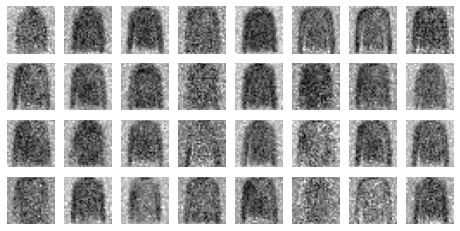

Epoch 2/20


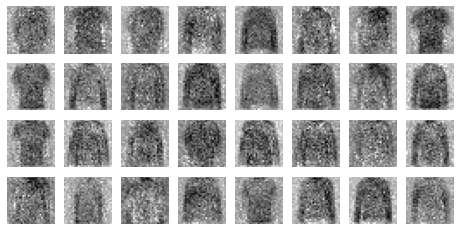

Epoch 3/20


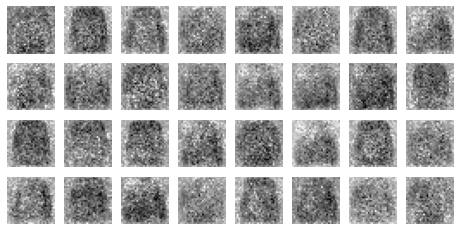

Epoch 4/20


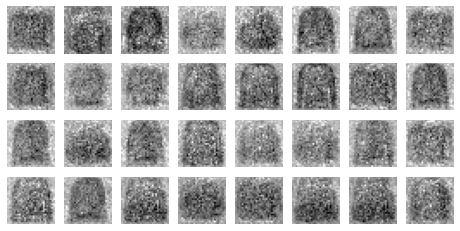

Epoch 5/20


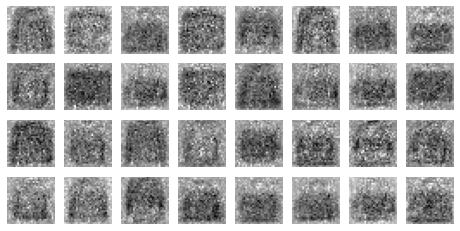

Epoch 6/20


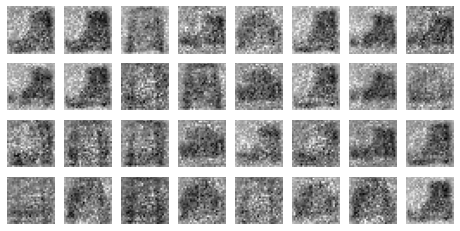

Epoch 7/20


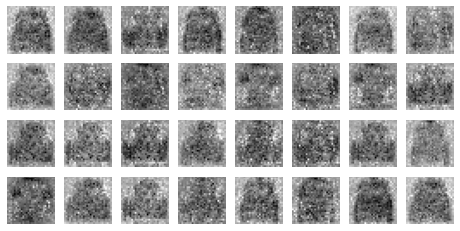

Epoch 8/20


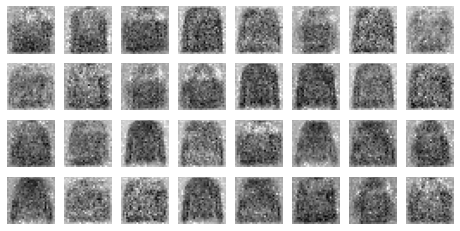

Epoch 9/20


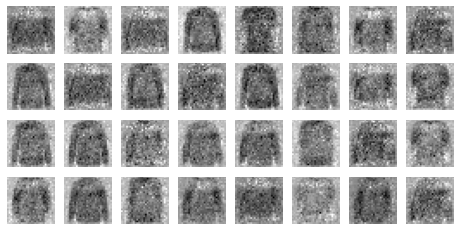

Epoch 10/20


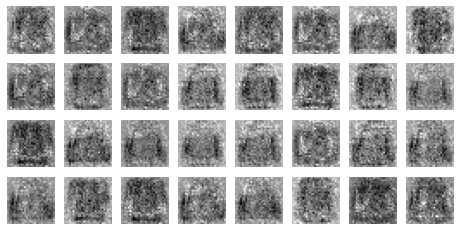

Epoch 11/20


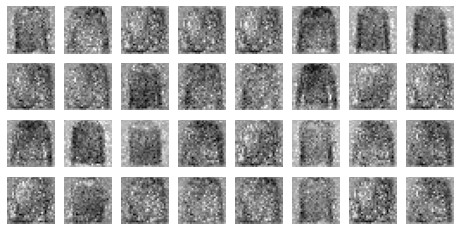

Epoch 12/20


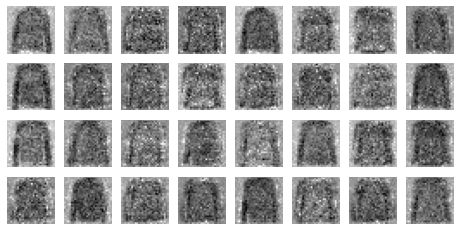

Epoch 13/20


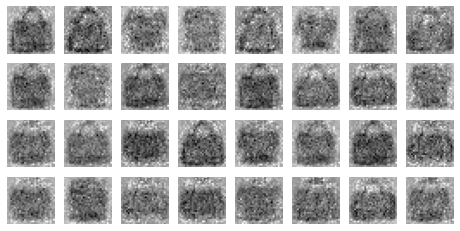

Epoch 14/20


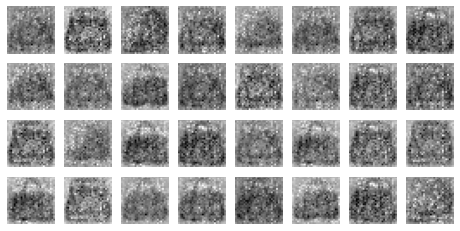

Epoch 15/20


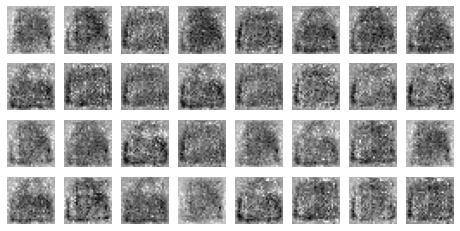

Epoch 16/20


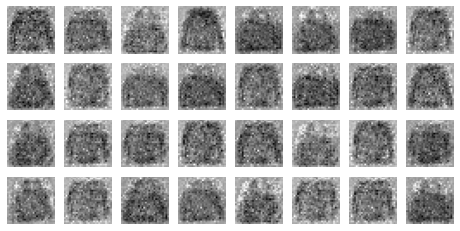

Epoch 17/20


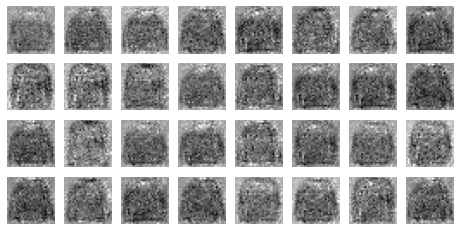

Epoch 18/20


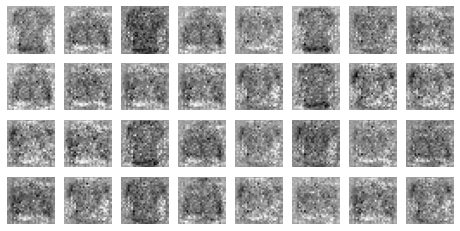

Epoch 19/20


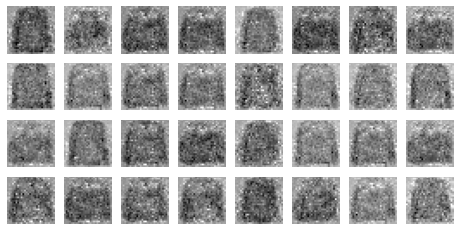

Epoch 20/20


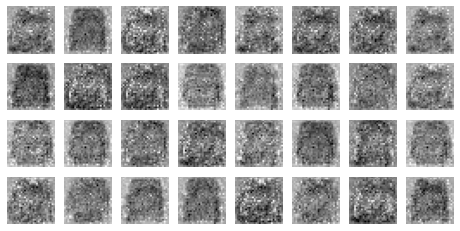

In [10]:
def train_gan(gan, dataset, batch_size, latent_size, epochs):
  generator, discriminator = gan.layers
  for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for X_batch in dataset:
      ## discriminator training
      noise = tf.random.normal(shape=[batch_size, latent_size])
      generated_images = generator(noise)
      X_discr = tf.concat([generated_images, X_batch], axis=0)
      y_discr = tf.constant(batch_size * [[0.]] + batch_size * [[1.]])
      discriminator.trainable = True
      discriminator.train_on_batch(X_discr, y_discr)

      ## generator training
      noise = tf.random.normal(shape=[batch_size, latent_size])
      generated_images = generator(noise)
      y_gen = tf.constant(batch_size * [[1.]])
      discriminator.trainable = False
      gan.train_on_batch(noise, y_gen)
    plot_multiple_images(generated_images, 8)             
    plt.show()



batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

train_gan(gan, dataset, batch_size, latent_size, 20)